Performance comparison
veto:   64.696 s  (N=2000, M=20000)
memory: 76.263 s  (N=2000, M=20000)
speedup (veto/memory): 0.85x


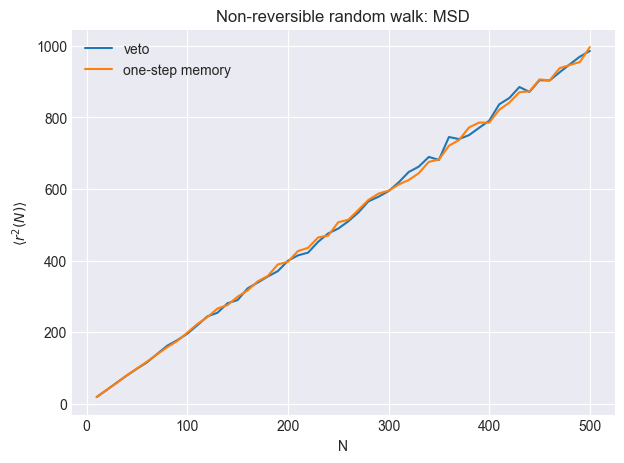

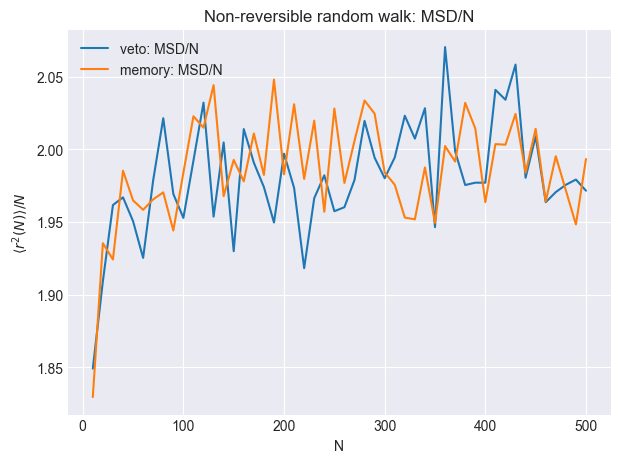

In [ ]:
from random import choice
import time
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

DIRS = [(1, 0), (0, 1), (-1, 0), (0, -1)]


# -----------------------------
# (a) Vetoing algorithm
# -----------------------------
def walk_veto(N):
    x, y = 0, 0
    prev = None  # previous step vector (dx, dy)

    for _ in range(N):
        while True:
            dx, dy = choice(DIRS)
            if prev is None or (dx, dy) != (-prev[0], -prev[1]):
                break
        x += dx
        y += dy
        prev = (dx, dy)

    return x, y


# -----------------------------
# (b) One-step memory algorithm
# -----------------------------
def walk_memory(N):
    x, y = 0, 0
    prev = None

    for _ in range(N):
        if prev is None:
            dx, dy = choice(DIRS)
        else:
            back = (-prev[0], -prev[1])
            allowed = [v for v in DIRS if v != back]  # 3 directions
            dx, dy = choice(allowed)

        x += dx
        y += dy
        prev = (dx, dy)

    return x, y


# -----------------------------
# Helpers
# -----------------------------
def benchmark(fn, N=1000, M=20000):
    t0 = time.perf_counter()
    for _ in range(M):
        fn(N)
    t1 = time.perf_counter()
    return t1 - t0


def mean_r2(fn, N=1000, M=20000):
    s = 0.0
    for _ in range(M):
        x, y = fn(N)
        s += x * x + y * y
    return s / M


def msd_curve(fn, Ns, M=5000):
    return [mean_r2(fn, N, M) for N in Ns]


# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    # Performance comparison
    N_perf = 2000
    M_perf = 20000

    tv = benchmark(walk_veto, N=N_perf, M=M_perf)
    tm = benchmark(walk_memory, N=N_perf, M=M_perf)

    print("Performance comparison")
    print(f"veto:   {tv:.3f} s  (N={N_perf}, M={M_perf})")
    print(f"memory: {tm:.3f} s  (N={N_perf}, M={M_perf})")
    print(f"speedup (veto/memory): {tv/tm:.2f}x")

    # Optional: Compare <r^2(N)> scaling
    Ns = list(range(10, 501, 10))
    M_msd = 5000

    msd_veto = msd_curve(walk_veto, Ns, M=M_msd)
    msd_mem = msd_curve(walk_memory, Ns, M=M_msd)

    plt.figure(figsize=(7, 5))
    plt.plot(Ns, msd_veto, label="veto")
    plt.plot(Ns, msd_mem, label="one-step memory")
    plt.xlabel("N")
    plt.ylabel(r"$\langle r^2(N)\rangle$")
    plt.title("Non-reversible random walk: MSD")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7, 5))
    plt.plot(Ns, [msd_veto[i] / Ns[i] for i in range(len(Ns))], label="veto: MSD/N")
    plt.plot(Ns, [msd_mem[i] / Ns[i] for i in range(len(Ns))], label="memory: MSD/N")
    plt.xlabel("N")
    plt.ylabel(r"$\langle r^2(N)\rangle / N$")
    plt.title("Non-reversible random walk: MSD/N")
    plt.legend()
    plt.show()